# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline


In [2]:
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.shape

(130, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [5]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [6]:
df.describe(include=['object'])

,gender
count,130
unique,2
top,F
freq,65


# Exercise # 1 & 2
   * Let's plot the data and see the shpae of the curve 
   



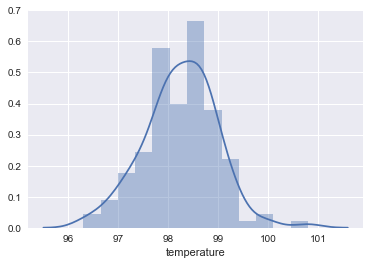

In [7]:
# plot the distribution
sns.distplot(df.temperature)

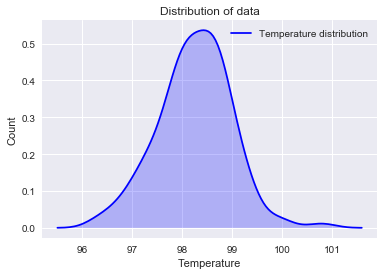

In [8]:
sns.kdeplot(df.temperature , color='B', shade=True, label='Temperature distribution')
plt.title('Distribution of data')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend(loc=1)


In [9]:
# Find out the mean, standard deviation & SEM of sample
temperature_mean = df.temperature.mean()
temperature_std = df.temperature.std()
temperature_sem = df.temperature.sem()
temperature_mean, temperature_std, temperature_sem

(98.24923076923078, 0.7331831580389454, 0.06430441683789101)

In [10]:
# validate through formula
k2,p_val=stats.normaltest(df.temperature)
print(p_val)

0.258747986349


+ Both the plots clearly say the temperature is normally distributed. Also we checked p-value which is greater than 0.05. This shows temperature distribution is normal.


+ Any sample > 30 is considered as a good sample. We have 130 observations which is large enough to derive the conclusions.


+ One person’s body temperature is not dependent on others so the observations are independent.
<br>
***

# Exercise# 3

**Ho ==> True population mean is 98.6 degrees F**

**H1 ==> True population mean is not 98.6 degrees F**

Let's move ahead with null hypothesis

In [11]:
#calculate Zscore and p_value if mean is 98.6
Ho_mean= 98.6 # As per Ho
z_score = (temperature_mean-Ho_mean)/temperature_sem
p_value = stats.norm.sf(abs(z_score))*2 #two-sided
# Print all the values
print("sample std: ", temperature_std)
print("sample mean: ", temperature_mean)
print("z_score:", z_score)
print("p_values:", p_value)

sample std:  0.7331831580389454
sample mean:  98.24923076923078
z_score: -5.45482329236
p_values: 4.90215701411e-08


In [12]:
# t_stats, using the function
temp_t_stats, temp_p_val= stats.ttest_1samp(df.temperature, Ho_mean)
print('t_stats:',temp_t_stats)
print('p_val:',temp_p_val*2)


t_stats: -5.45482329236
p_val: 4.82126408311e-07



We first derived z-score with formula: **(sample mean-population mean)/sample std error** . As per hypothesized mean (98.6) Z- score is -5.45. It means sample mean is **5 standard deviation away** from the population mean but as per the empirical rule 99.7% probability is within 3 standard deviation. 

  We also calculated the **t-statistic which is negative** implies that the sample mean is less than the hypothesized mean (98.6).
    
  Based on the above two evidences we can **reject the null hypothesis Ho==>True population mean is 98.6** degrees F and go with the alternate hypothesis.
  
<br>
*******


# Exercise #4
Let's find out the abnormal temperature using the confidence interval of 95 %

In [13]:
#95% margin interval
temperature_min, temperature_max = stats.norm.interval(0.95,temperature_mean,temperature_sem) 
print('Miminum temperature range', temperature_min)
print('Maximum temperature range', temperature_max)


Miminum temperature range 98.1231964282
Maximum temperature range 98.3752651103


In [14]:
#Margin of error = standard deviation* standard error 
temperature_me= temperature_std * temperature_sem
print('Margin of error:', temperature_me)

Margin of error: 0.0471469154131


In [15]:
#95% confidence interval with margin error

temperature_min = temperature_min - temperature_me
temperature_max = temperature_max + temperature_me
print( "Maximum range for normal temp :",temperature_min)
print( "Minimum range for normal temp :",temperature_max )


Maximum range for normal temp : 98.0760495128
Minimum range for normal temp : 98.4224120257


With this 95% confidence interval with margin error, it is concluded that temperature range below 98.02 and  above 98.46 is considered as abnormal.

<br>


# Exercise #5

**Ho(Null Hypothesis)==>** Males and females in normal temperature do not have significant difference i.e mean_m= mean_f

**H1(Alternate Hypothesis)** ==>Males and females in normal temperature have significant difference i.e mean_m <> mean_f


In [16]:
female_temp_df = df[df.gender=='F'].temperature
male_temp_df = df[df.gender=='M'].temperature
female_temp_df.shape, male_temp_df.shape 

((65,), (65,))

In [17]:
# Find out the mean, standard deviation & SEM of Male and Female sample
mean_f = female_temp_df.mean()
std_f = female_temp_df.std()
sem_f = female_temp_df.sem()

mean_m = male_temp_df.mean()
std_m = male_temp_df.std()
sem_m = male_temp_df.sem()

print('mean_f:', mean_f)
print('std_f:', std_f)
print('sem_f::', sem_f)

print('mean_m::', mean_m)
print('std_m::', std_m)
print('sem_m::', sem_m)

mean_f: 98.39384615384613
std_f: 0.7434877527313665
sem_f:: 0.0922183060804
mean_m:: 98.1046153846154
std_m:: 0.6987557623265908
sem_m:: 0.0866699855229


In [18]:
#95% margin interval
range_min, range_max = stats.norm.interval(0.95,mean_f,sem_f) 
print('Miminum Female temp range', range_min)
print('Maximum Female temp range', range_max)

Miminum Female temp range 98.2131015952
Maximum Female temp range 98.5745907125


In [19]:
#Margin of error = standard deviation* standard error 
me_f = std_f * sem_f
print('Margin of error:', me_f)

Margin of error: 0.0685631811484


In [20]:
#95% confidence interval with margin error

mean_f_min = range_min - me_f
mean_f_max = range_min + me_f
print( "Minimum range for female normal temp :",mean_f_min )
print( "Maximum range for female normal temp :",mean_f_max)

Minimum range for female normal temp : 98.1445384141
Maximum range for female normal temp : 98.2816647764


In [21]:
# t_stats, using the function
t_stats, p_val= stats.ttest_1samp(female_temp_df, mean_m)
print('t_stats:',t_stats)
print('p_val:',p_val*2)


t_stats: 3.13637044015
p_val: 0.00516837462609


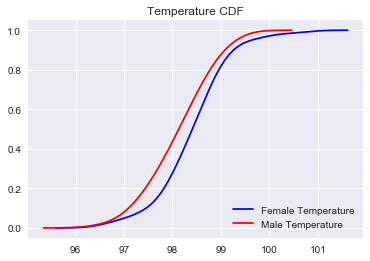

In [35]:
sns.kdeplot(female_temp_df , color='B', shade=False, cumulative=True, label='Female Temperature')
sns.kdeplot(male_temp_df , color='R', shade=False, cumulative=True, label='Male Temperature')
plt.legend(loc='lower right')
plt.title('Temperature CDF')

We first calculated 95% confidence interval of the female normal temp mean which is between the range **98.14 and 98.28**. Margin of error is 0.06. mean_m is not in range of 95% interval with +- MarginError. With this evidence, we can reject the hypothesis. 

Another way is to use the scipy formula to calculte the p_value and t-statistic. P_value is <0.05 

Based on the above two evidences we can **Reject the null hypothesis Ho(Null Hypothesis)==> Males and females in normal temperature do not have significant difference i.e mean_m= mean_f** and go with the alternate hypothesis.